# Project: Investigate a Dataset (Tmdb-movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> in this project, I am analysing the TMDb dataset. the dataset contains 10,000 movies collected from the movir Database(TMDb).
In this project, we will be analyzing dataset containing information associated with 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

And in particular, we will be interested in answering the following questions;

1. which movies generated the most revenues across the years?
2. which movies had the most expensive budgets?
3. which movie genre are the most popular from year to year?

In [1]:
#import your packages

import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [2]:
#load the dataset into the dataframe

movies= pd.read_csv('tmdb-movies.csv')
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
movies.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
#let's take a look at our dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
movies.shape

(10866, 21)

In [6]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning 

After exploring my dataset, i will perform some wrangling to remove columns that are irrelvant in this analysis. i will be paying more attention to features like popularity, budget, revenue, genre, among others.). we can create a new dataframe with just the features we will need.

In [7]:
movies_new=movies[['id', 'popularity', 'budget', 'revenue', 'original_title', 
            'director', 'genres','vote_count', 'vote_average', 'release_year']]
movies_new.head()

,id,popularity,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015


In [8]:
movies_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   director        10822 non-null  object 
 6   genres          10843 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 849.0+ KB


In [9]:
#check for duplicate rows
movies_new.duplicated().sum()

1

In [10]:
#drop duplicate rows
movies_new.drop_duplicates(inplace=True)
movies_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  int64  
 3   revenue         10865 non-null  int64  
 4   original_title  10865 non-null  object 
 5   director        10821 non-null  object 
 6   genres          10842 non-null  object 
 7   vote_count      10865 non-null  int64  
 8   vote_average    10865 non-null  float64
 9   release_year    10865 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 933.7+ KB


C:\Users\CHISOM\AppData\Local\Temp\ipykernel_5316\381390240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_new.drop_duplicates(inplace=True)


In [11]:
#check for null values
movies_new.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [12]:
# fill the null values in director with 'not_listed'
movies_new['director'].fillna('not_listed', inplace = True)

C:\Users\CHISOM\AppData\Local\Temp\ipykernel_5316\2352724746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_new['director'].fillna('not_listed', inplace = True)


In [13]:
# fill the null values in genres with 'not_listed'
movies_new['genres'].fillna('not_listed', inplace = True)

C:\Users\CHISOM\AppData\Local\Temp\ipykernel_5316\2518176554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_new['genres'].fillna('not_listed', inplace = True)


In [14]:
movies_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  int64  
 3   revenue         10865 non-null  int64  
 4   original_title  10865 non-null  object 
 5   director        10865 non-null  object 
 6   genres          10865 non-null  object 
 7   vote_count      10865 non-null  int64  
 8   vote_average    10865 non-null  float64
 9   release_year    10865 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 933.7+ KB


## Data Wrangling

#### Question 1:  which movie genre generated the most revenues across the years?`

In [15]:
movies_new['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

we can see that there are 3 genres attachd to each movie so it will be hard for us to find make any correct analysis like this. we will first have to split the genre column

In [16]:
# splitting the genre column for analysis
s = movies_new['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del movies_new['genres']
movies_new = movies_new.join(s)
movies_new.head()

,id,popularity,budget,revenue,original_title,director,vote_count,vote_average,release_year,genres
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,5562,6.5,2015,Action
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,5562,6.5,2015,Adventure
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,5562,6.5,2015,Science Fiction
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,5562,6.5,2015,Thriller
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,6185,7.1,2015,Action


In [17]:
movies_most_revenues = pd.DataFrame(movies_new.groupby('genres')['revenue'].sum()).sort_values('revenue', ascending = True)
movies_most_revenues

,revenue
genres,
not_listed,0
TV Movie,42000000
Foreign,285846449
Documentary,1061375637
Western,4713837032
History,10691938934
Music,11657281626
War,12853399491
Horror,27538937718


In [18]:
# Create a function to plot a bar chart
def df_bar(column_name, title):
    column_name.plot.barh(stacked=True, title = title, figsize = (8,8));

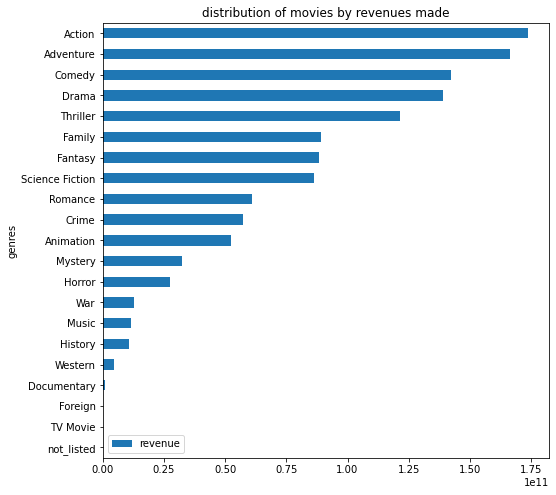

In [19]:
# Plot chart using df_bar functio
df_bar(movies_most_revenues[['revenue']], "distribution of movies by revenues made")

from our visualization and wrangling, we can see that action movies generated the most revenies, while documentary and foreign movies didn't make enough profits.

#### Question 2: which movies had the most expensive budgets?

In [20]:
movies_most_budget = pd.DataFrame(movies_new.groupby('genres')['budget'].sum()).sort_values('budget', ascending = True)
movies_most_budget

,budget
genres,
not_listed,5000
TV Movie,44700000
Foreign,272869766
Documentary,300117557
Western,3130727816
Music,3850960040
War,5640809248
History,6210703047
Horror,10192828318


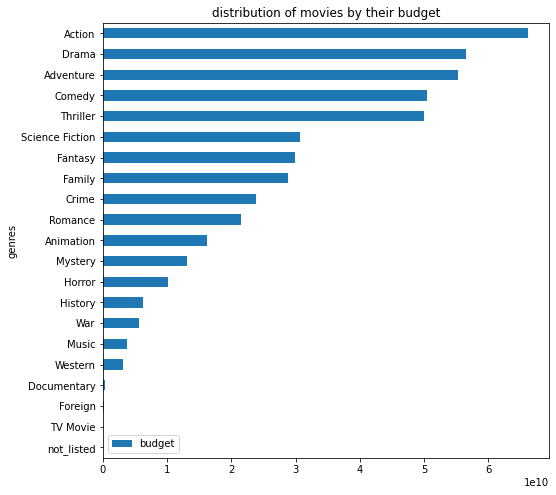

In [21]:
# Plot chart using df_bar function
df_bar(movies_most_budget[['budget']], "distribution of movies by their budget")

from my analysis, I can see that Action and Comedy movies have the most budget, while documentary an d foreign and TV movies have the least budget. this is an interesting insight as i noticed similar relationship when i compared movie genres by their revenues.
for this reason, I am curious to see the relationship between movie budgets and their revenues to see if this relationship may be an infleuncing factor.

Text(0, 0.5, 'Revenue')

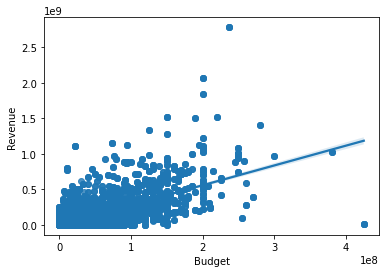

In [22]:
sb.regplot(data=movies_new, x='budget', y='revenue');
plt.xlabel('Budget')
plt.ylabel('Revenue')

for the most port, there seem to be positive correlation between the budget and the revenue of a movie. this could mena that the more bufgte spent in movie production, the more likely it is to do well in the box office.

#### Question 3: Which genres are most popular from year to year?

In [23]:
movies_most_popular = pd.DataFrame(movies_new.groupby('genres')['popularity'].sum()).sort_values('popularity', ascending = True)
movies_most_popular

,popularity
genres,
not_listed,3.863223
Foreign,36.001309
TV Movie,45.239592
Documentary,94.344445
Western,97.451554
History,192.362605
War,196.474450
Music,198.827043
Mystery,558.909827


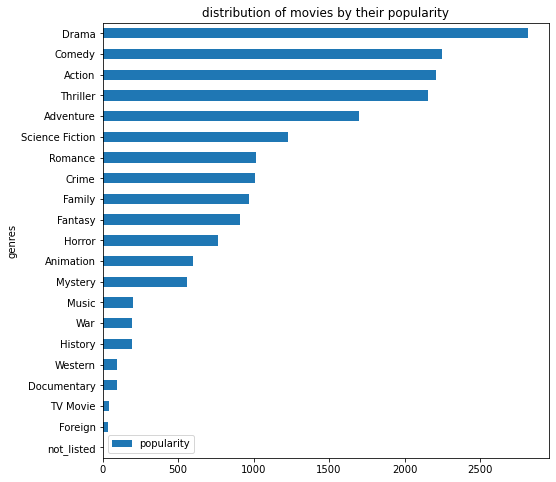

In [24]:
# Plot chart using df_bar function
df_bar(movies_most_popular[['popularity']], "distribution of movies by their popularity")

from my analysis, I can see that drama and comedy movies are the most popular among the audience. Coincidentally, Documentary, Tv movies, and Foreign are the least popular/ watched.

<a id='conclusions'></a>
## Conclusions

After the analysis, we can conclude that;
1. the movies that performed the most at box office and generated the most revenue were action movies followed closely by adventure movies. while documentaries and forrign movies made the least returns.
2. the movies that had the most budget were action movies followed closely by drama. while documentaries and forign movies had the least budget.
3. i noticed a positive correlation between mobvie budget and movie revenuie. for the most part, the movies that had the most budget seem to perform the best at box office.
4. the most popular movie genre was 'drama' followed closely by comedy. while the least popular movie genres where tv shows and foreign movies. 

For the most part, foreign movies seem to be the least popular, least expensive and least profitable genre.